In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [2]:
x1 = None
x2 = None
y1 = None
y2 = None

In [5]:
filename = 'data1.csv'
df = pd.read_csv(filename, delimiter=';')

In [6]:
xdata = df.n
ydata = df.t
dy = df.dt

In [7]:
dxx = np.var(xdata)
dyy = np.var(ydata)

In [8]:
plt.rcParams['figure.dpi'] = 300

style_scatter = '.r'
style_line = '--k'

In [9]:
curve = lambda x, k, b: k*x + b;
popt, pcov = curve_fit(curve, xdata, ydata)
dk = (1/len(xdata-2) * (dyy/dxx - popt[0]**2))**0.5
dk

np.float64(0.009374581820157329)

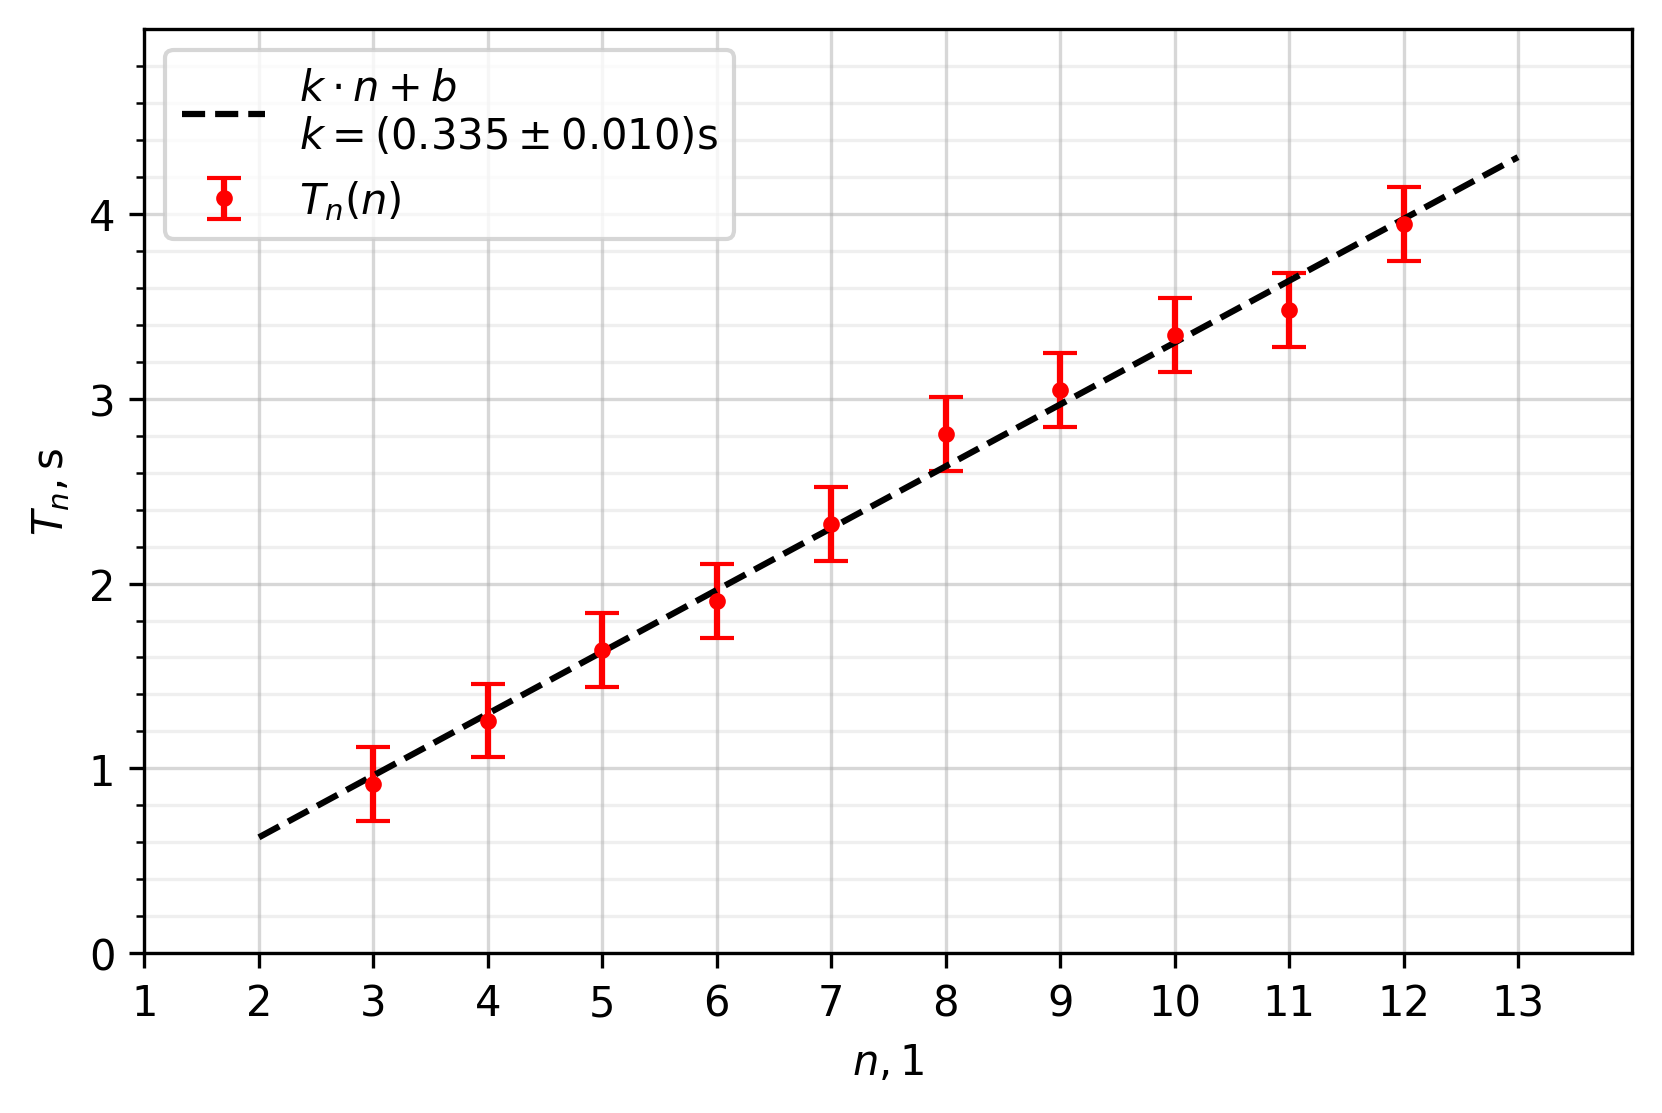

In [10]:
fig = plt.figure(figsize=(6.4, 4.0))
ax = fig.add_subplot(111)
ax.set_xlim((1, 14))
ax.set_ylim((0.0, 5))
ax.set_xlabel(r'$n, 1$')
ax.set_ylabel(r'$T_n, \mathrm{s}$')

ax.set_xticks(np.arange(1, 14, 1))
ax.set_yticks(np.arange(0, 5, 0.2), minor=True)
ax.set_yticks(np.arange(0, 5, 1))

ax.plot(xdata, ydata, style_scatter, ms=5, lw=1, label='')
ax.errorbar(xdata, ydata, yerr=dy, capsize=4, fmt='.r', label='$T_n(n)$')

ax.plot((2,13), curve(np.array((2,13)), popt[0], popt[1]), '--k', label=r'$k \cdot n + b$'+'\n'+r'$k=(0.335\pm0.010)\mathrm{s}$')

ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.2)

ax.legend()

In [67]:
xdata = np.array([4, 6, 8, 10, 12])
ydata = np.array([36, 71, 117, 93, 178])

In [68]:
dxx = np.var(xdata)
dyy = np.var(ydata)

In [69]:
curve = lambda x, k, b: k*x + b;
popt, pcov = curve_fit(curve, xdata, ydata)
dk = (1/len(xdata-2) * (dyy/dxx - popt[0]**2))**0.5
(popt[0],dk)

(15.300000000031188, 3.1546790644706055)

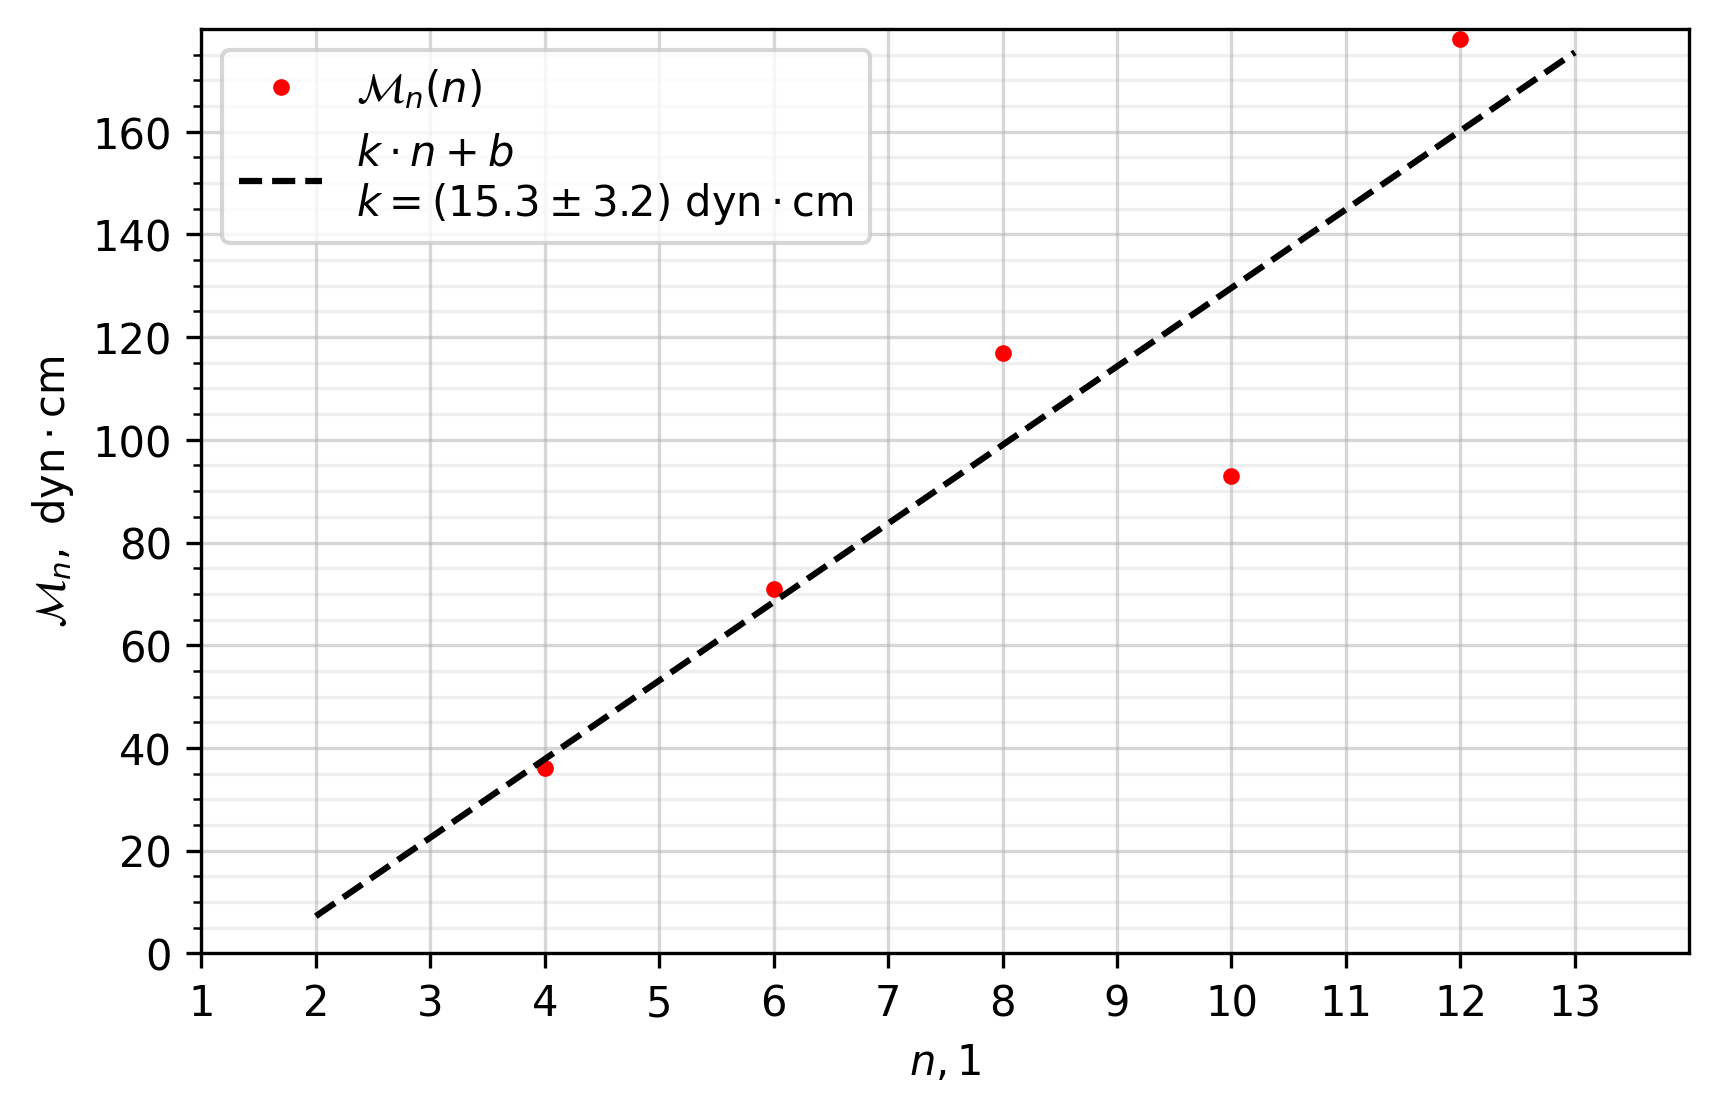

In [73]:
fig = plt.figure(figsize=(6.4, 4.0))
ax = fig.add_subplot(111)
ax.set_xlim((1, 14))
ax.set_ylim((0.0, 180))
ax.set_xlabel(r'$n, 1$')
ax.set_ylabel(r'$\mathcal{M}_n,~\mathrm{dyn}\cdot\text{cm}$')

ax.set_xticks(np.arange(1, 14, 1))
ax.set_yticks(np.arange(0, 180, 5), minor=True)
ax.set_yticks(np.arange(0, 180, 20))

ax.plot(xdata, ydata, style_scatter, ms=5, lw=1, label='')
ax.plot(xdata, ydata, '.r', label='$\mathcal{M}_n(n)$')

ax.plot((2,13), curve(np.array((2,13)), popt[0], popt[1]), '--k', label=r'$k \cdot n + b$'+'\n'+r'$k=(15.3\pm3.2)~\mathrm{dyn}\cdot\text{cm}$')

ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.2)

ax.legend()